In [10]:
#imports
from shared_tools.make_datasets import x_train, y_train
from matplotlib import pyplot as plt
from typing import Iterable
import pickle, os, numpy as np
from PIL import Image
from deap import gp
from functools import partial
from run_gp import get_pset
from tree import Tree, show_img


TypeError: Tree.of() missing 1 required positional argument: 'pset'

In [2]:
aro, val = sum(a for a, _ in y_train) / len(y_train), sum(v for _, v in y_train) / len(y_train)

def show(a_v_pairs: list[tuple[float, float]]) -> None:
    plt.scatter([a for a, _ in a_v_pairs], [v for _, v in a_v_pairs],  s=20, color=(0.1, 0.1, 1, 0.7))
    plt.scatter([aro], [val], s=100, color=(1, 0, 0, 0.7))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.xlabel("arousal")
    plt.ylabel("valence")
    plt.show()


In [3]:
def models(dir_path: str, prefix='') -> list[gp.PrimitiveTree]:
    path = f"{dir_path}/data"
    models= [pickle.load(open(f"{path}/{file}", 'rb')) for file in os.listdir(path) if f'{prefix}best' in file]
    return models

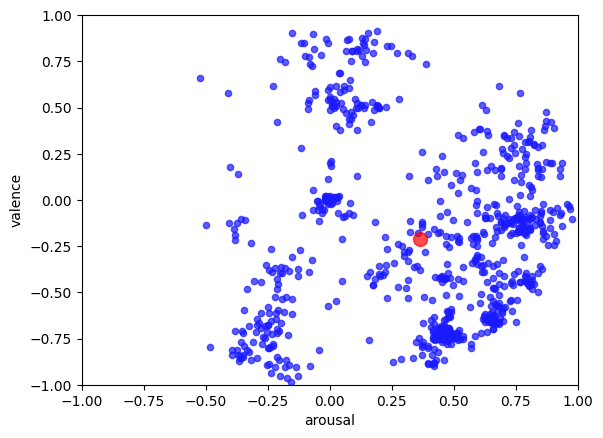

In [4]:
show(y_train)

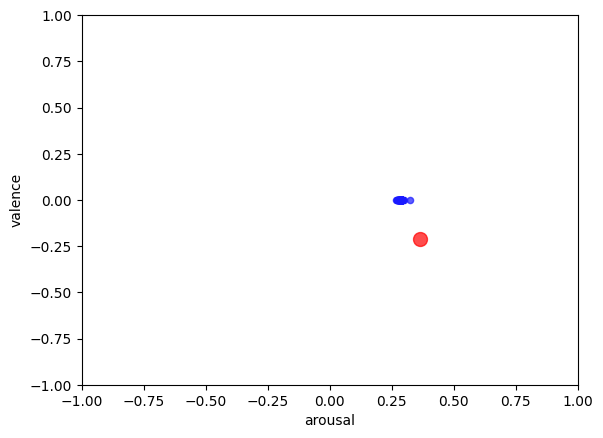

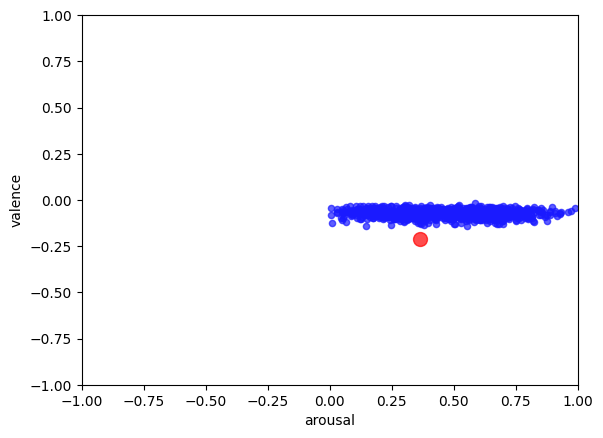

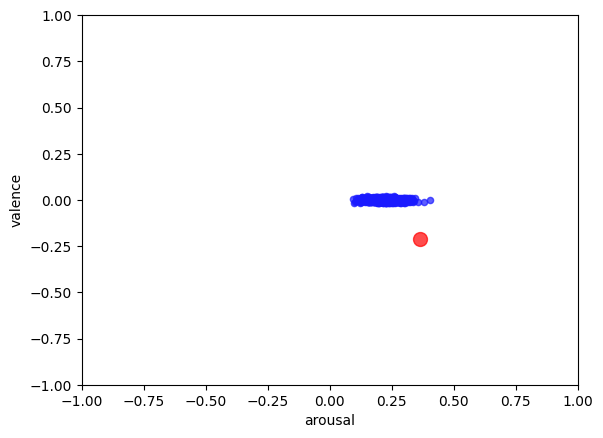

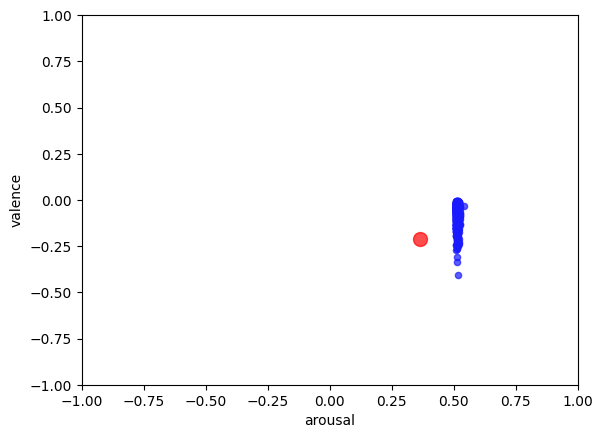

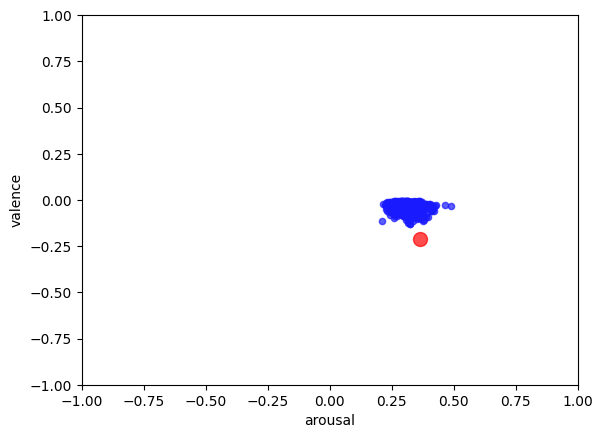

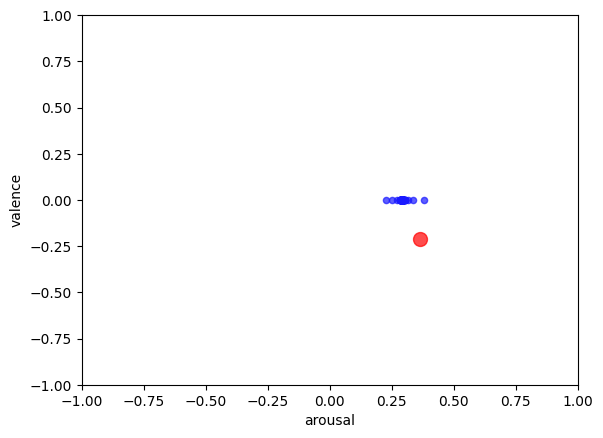

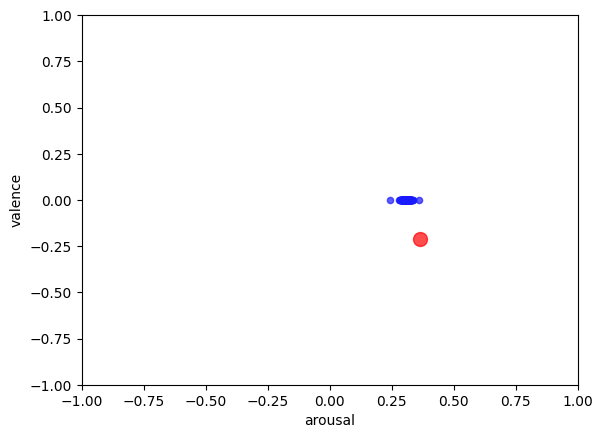

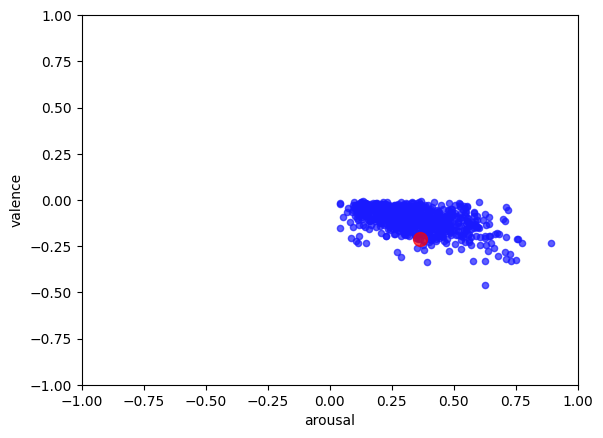

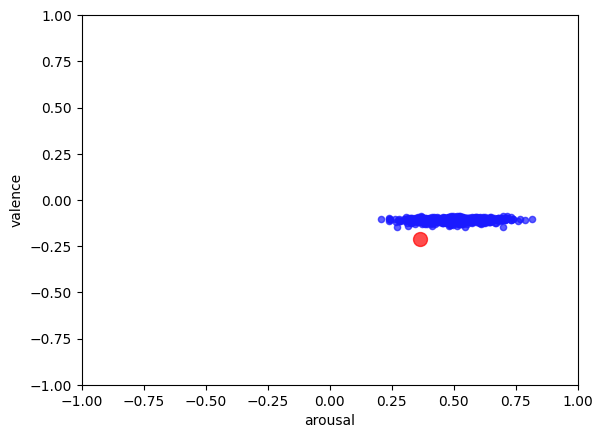

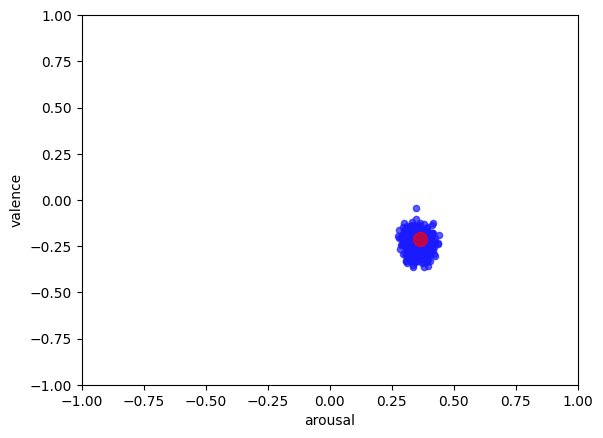

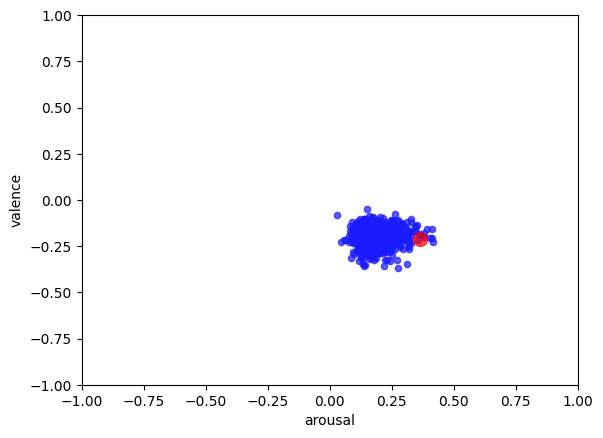

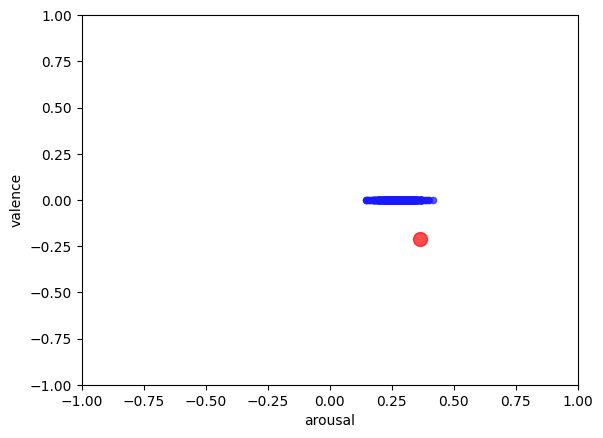

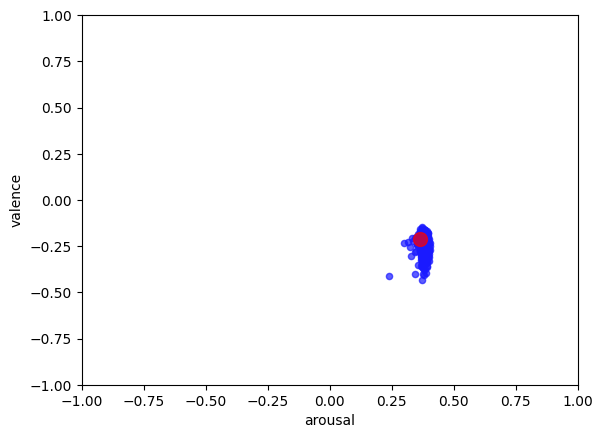

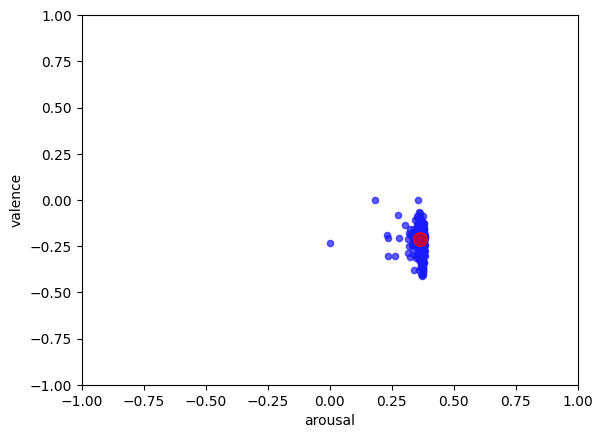

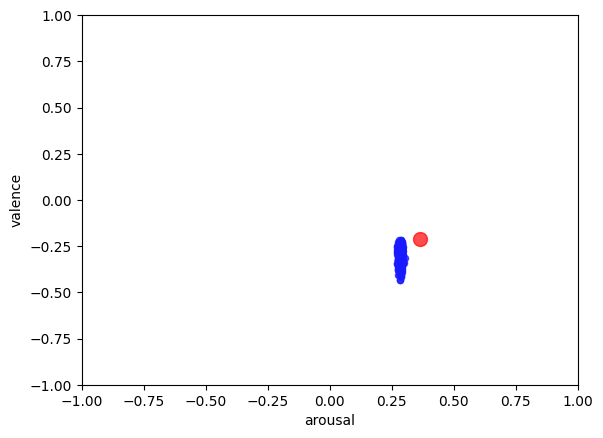

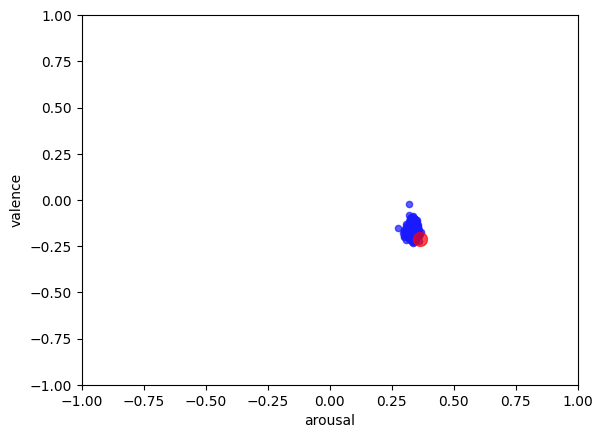

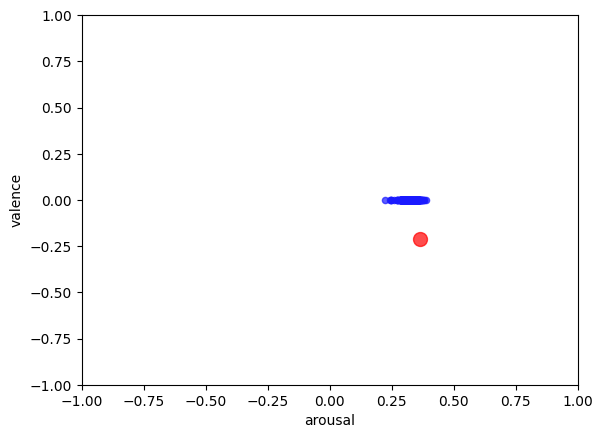

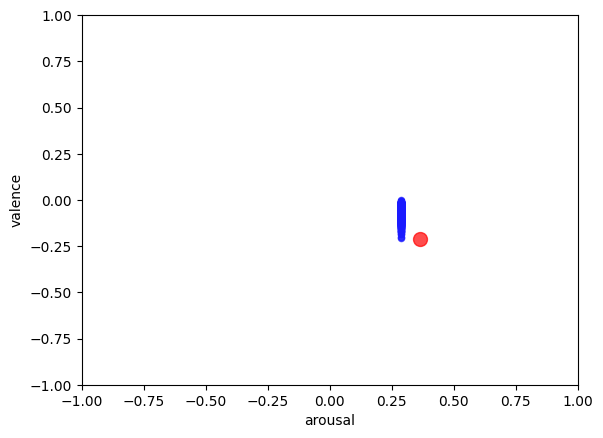

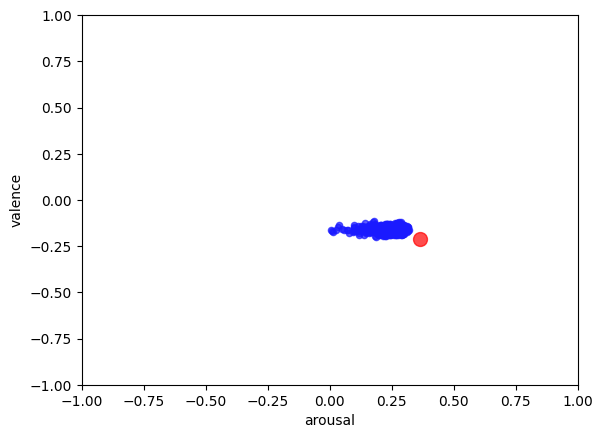

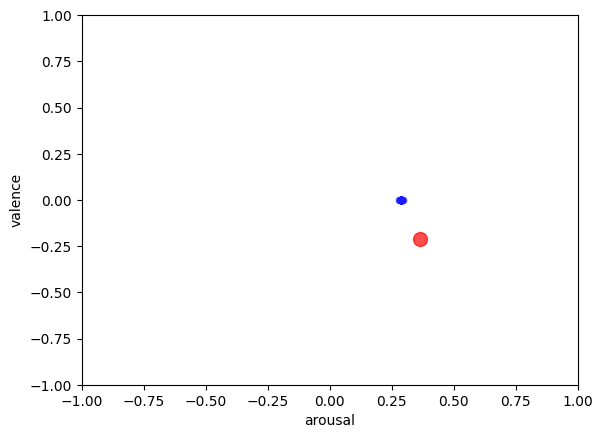

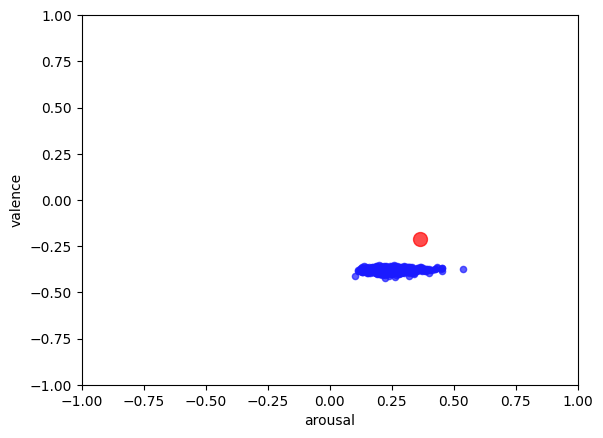

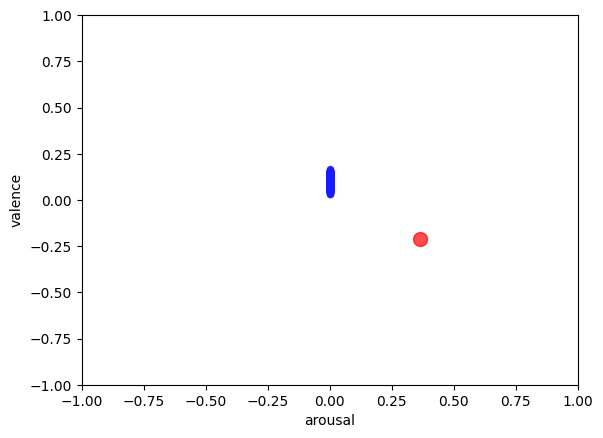

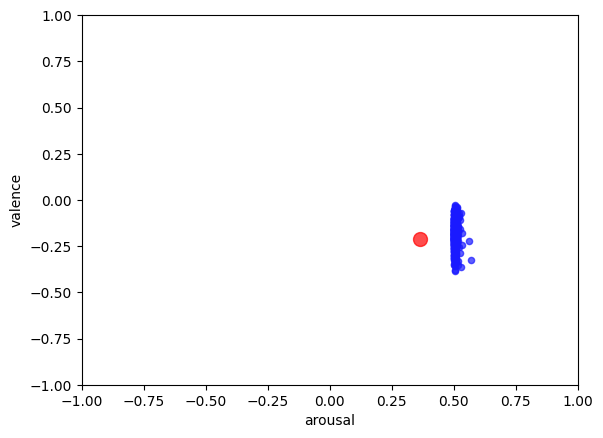

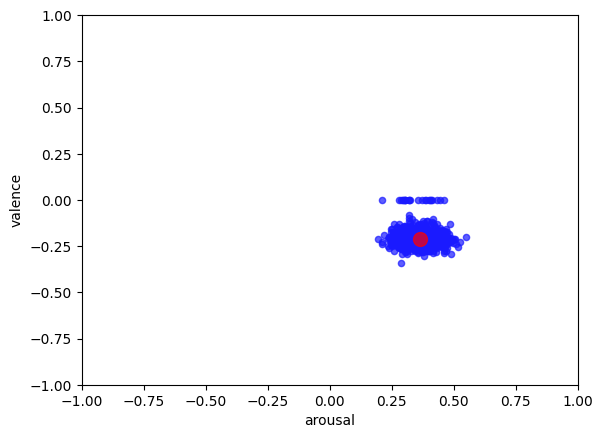

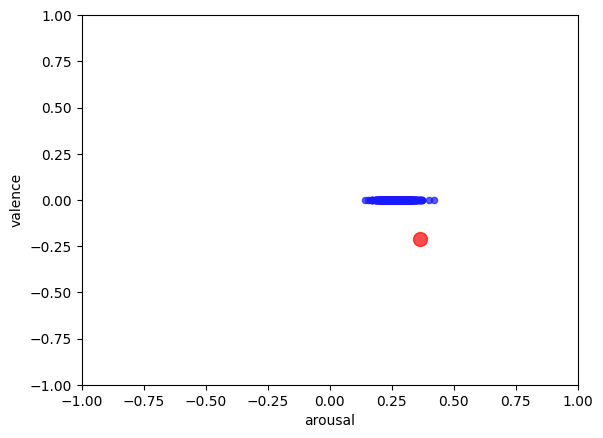

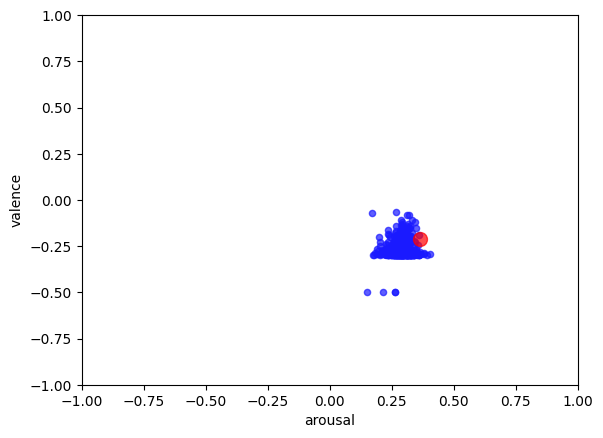

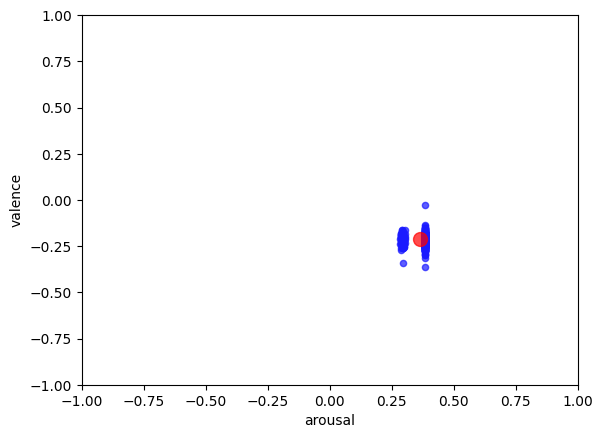

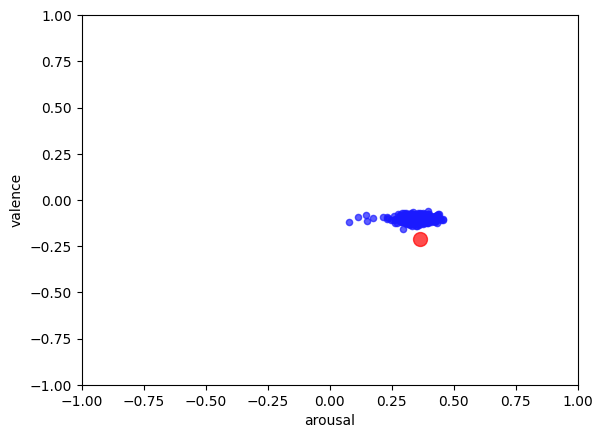

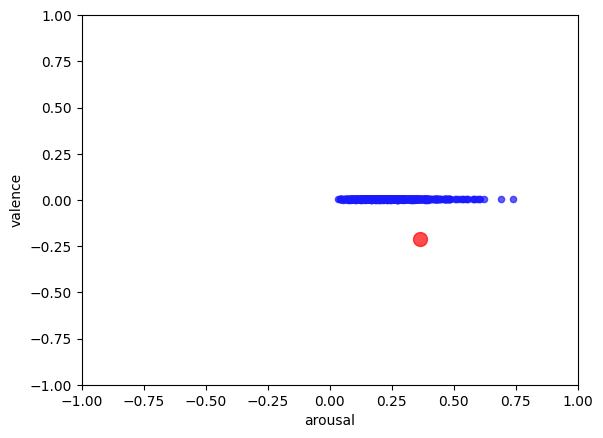

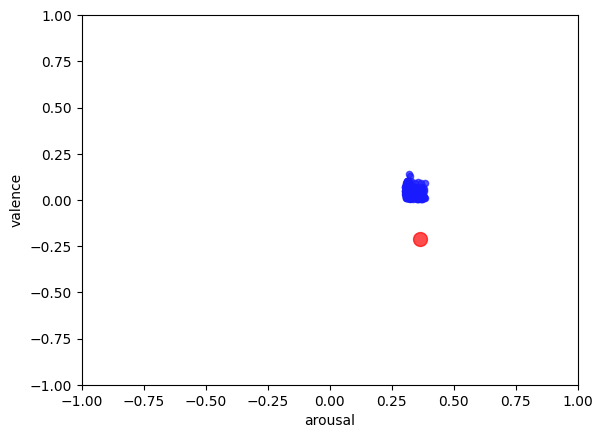

In [5]:
compile = partial(gp.compile, pset=get_pset('simple_pred'))
for model in models('simple_pred'):
    
    #print(model[0].arity)
    nodes, edges, labels = gp.graph(model)

    predictor = compile(model)
    predictions = [predictor(img) for img in x_train]
    show(predictions)


In [6]:
model = sorted(models('simple_pred'), key=len)[5]
f = Tree.of(model, get_pset('simple_pred'))
assert str(model) == str(f), f"{model} != {f}"

In [7]:
from IPython.display import Image, display

for i, model in list(enumerate(models('simple_pred')))[:5]:
    f = Tree.of(model, get_pset('simple_pred'))

    f.save_graph(f"model{i}-1.png", x_train[0]), f.save_graph(f"model{i}-2.png", x_train[10])
    print(f"Model {i} drawn")
    #display(Image(filename=f"test{i}-1.png")), display(Image(filename=f"test{i}-2.png"))
    #Image.open(f"test2-{i}.png").show()

Model 0 drawn
Model 1 drawn
Model 2 drawn
Model 3 drawn
Model 4 drawn


In [9]:
!rm _treedata/*